In [3]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 


# Read in the data

df = pd.read_csv(r'C:\Users\joebe\Desktop\movie dataset\movies.csv')

In [4]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Any missing data?

for col in df.columns:
    missing_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_pct))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
# Data Types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Changing budget and gross column to int64
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [19]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [13]:
df['released'] = df['released'].astype(str)

def correct_year(date_string):
    match = re.search(r'(\d{4})', date_string)
    return int(match.group(1)) if match else None

df['year'] = df['released'].apply(correct_year)
df.head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Escape from New York,R,Action,1981.0,"July 10, 1981 (United States)",7.2,131000.0,John Carpenter,John Carpenter,Kurt Russell,United States,6000000,25244626,AVCO Embassy Pictures,99.0
96,The Evil Dead,NC-17,Horror,1983.0,"April 15, 1983 (United States)",7.5,192000.0,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000,2956630,Renaissance Pictures,85.0
97,Porky's,R,Comedy,1982.0,"March 19, 1982 (United States)",6.2,40000.0,Bob Clark,Bob Clark,Dan Monahan,Canada,2500000,111289673,Astral Bellevue Pathé,94.0
98,Blow Out,R,Crime,1981.0,"July 24, 1981 (United States)",7.4,47000.0,Brian De Palma,Brian De Palma,John Travolta,United States,18000000,12000000,Filmways Pictures,108.0


In [15]:
# We have our year but lets get rid of that .0 at the end

df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [19]:
# Checking for our conversations
zero_or_na_years = df['year'].isna() | (df['year'] == 0)
print("0 or NA Year Values:")
print(df[zero_or_na_years])

0 or NA Year Values:
                        name rating  genre  year released  score     votes  \
5728  Saw: The Final Chapter      R  Crime     0      nan    5.6   93000.0   
5730             The Wolfman      R  Drama     0      nan    5.8  104000.0   

            director               writer              star country  budget  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell     NaN       0   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro     NaN       0   

      gross company  runtime  
5728      0     NaN      NaN  
5730      0     NaN      NaN  


In [17]:
# Ordering by gross revenue
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2007,"May 24, 2007 (Germany)",6.3,12000.0,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0


In [19]:
# Looking at all of the data

pd.set_option('display.max_rows', None)

In [21]:
# Looking for duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
# Empty dataframe indicates there are no duplicates

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [23]:
# Correlations

# More they spend the more they make (High Correlation)

correlation = df['budget'].corr(df['gross'])
print('Budget and Gross Revenue', correlation)

# The Higher the score the higher the gross revenue

correlation1 = df['score'].corr(df['gross'])
print('Score and Gross Revenue:', correlation1)

# Gross Revenue and Year

correlation2 = df['year'].corr(df['gross'])
print('Year and Gross Revenue:', correlation2)

Budget and Gross Revenue 0.687124428030957
Score and Gross Revenue: 0.16940587921654535
Year and Gross Revenue: 0.08853319664750307


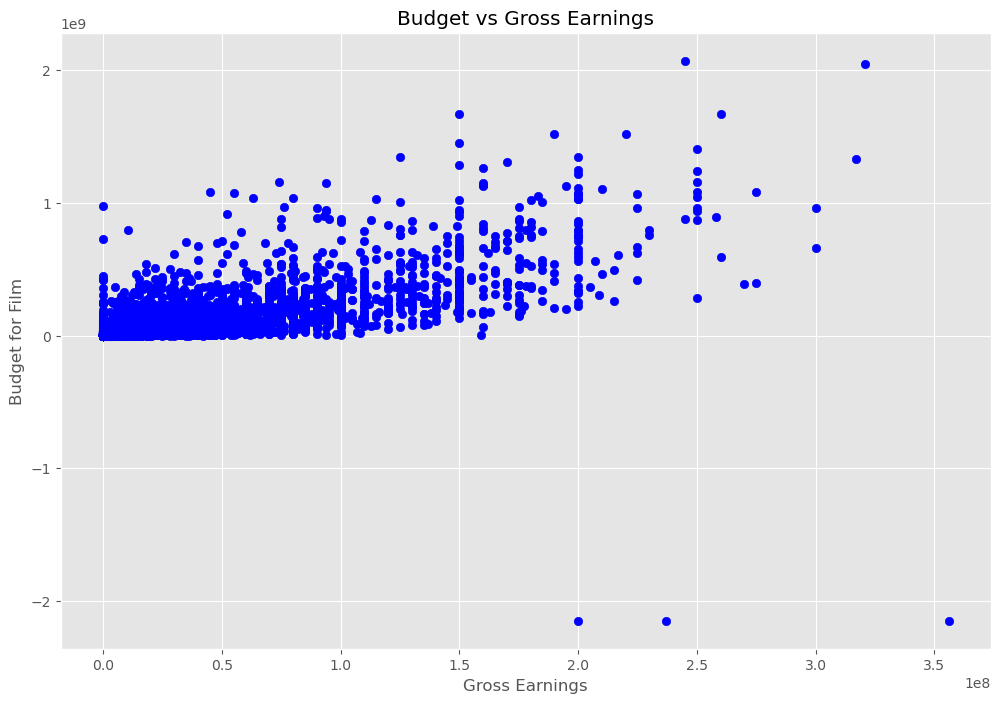

In [35]:
# Scatterplot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], c='blue')

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

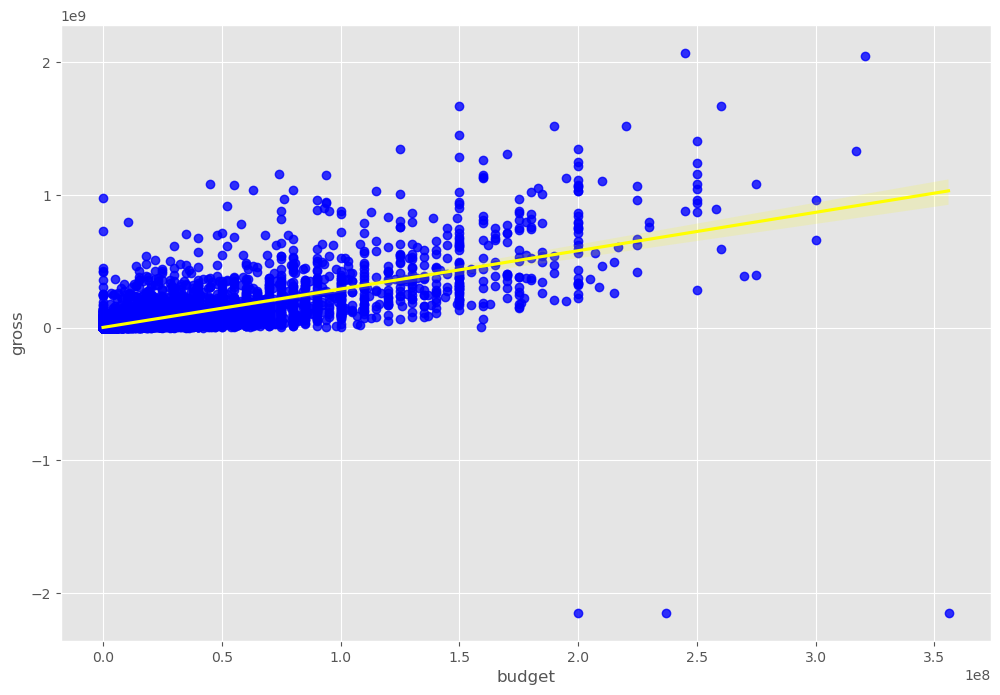

In [33]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"blue"}, line_kws={"color":"yellow"})

             year     score     votes    budget     gross   runtime
year     1.000000  0.045473  0.070314  0.108069  0.088533  0.120636
score    0.045473  1.000000  0.409182  0.055665  0.169406  0.399451
votes    0.070314  0.409182  1.000000  0.486862  0.573889  0.309212
budget   0.108069  0.055665  0.486862  1.000000  0.687124  0.269510
gross    0.088533  0.169406  0.573889  0.687124  1.000000  0.204177
runtime  0.120636  0.399451  0.309212  0.269510  0.204177  1.000000


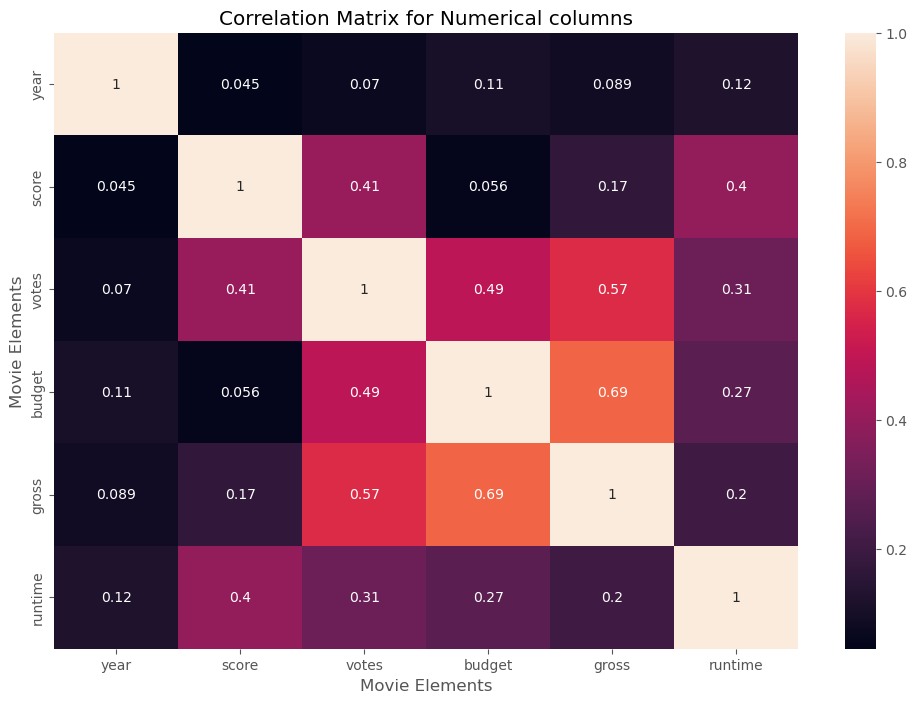

In [49]:
# All correlations
df_numerical_cols = df.select_dtypes(include='number')

correlation_matrix = df_numerical_cols.corr(method='pearson')

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numerical columns')

plt.xlabel('Movie Elements')

plt.ylabel('Movie Elements')

plt.show()

In [55]:
# Show us the highest correlations

numerical_pairs = df.select_dtypes(include='number')

correlation_matrix = numerical_pairs.corr(method='pearson')

high_correlation = correlation_matrix[correlation_matrix > 0.5]

print(high_correlation)

         year  score     votes    budget     gross  runtime
year      1.0    NaN       NaN       NaN       NaN      NaN
score     NaN    1.0       NaN       NaN       NaN      NaN
votes     NaN    NaN  1.000000       NaN  0.573889      NaN
budget    NaN    NaN       NaN  1.000000  0.687124      NaN
gross     NaN    NaN  0.573889  0.687124  1.000000      NaN
runtime   NaN    NaN       NaN       NaN       NaN      1.0


In [29]:
# Highest Grossing Companies

gross_grouped = df.groupby('company')['gross'].sum().reset_index().sort_values(by='gross', ascending=False)
top_20_highest = gross_grouped.head(20)
print(top_20_highest)

                            company        gross
2319                   Warner Bros.  56491421806
2281             Universal Pictures  52514188890
731               Columbia Pictures  43008941346
1812             Paramount Pictures  40493607415
2316           Walt Disney Pictures  36327887792
2253          Twentieth Century Fox  30913193094
1713                New Line Cinema  19883797684
887            DreamWorks Animation  11873612858
2232            Touchstone Pictures  11795832638
889             Dreamworks Pictures  11635441081
1606                 Marvel Studios  10120607435
1637      Metro-Goldwyn-Mayer (MGM)   9230230105
2147           Summit Entertainment   8373718838
1856        Pixar Animation Studios   7886344526
1109              Fox 2000 Pictures   7443502667
1540                      Lucasfilm   7185352192
2315  Walt Disney Animation Studios   6751509051
1521                      Lionsgate   6078452519
2242               TriStar Pictures   5667436463
2038                

In [31]:
# What company had the highest average movie scores?
avg_rating_per_movie = df.groupby('company')['score'].mean().reset_index()
avg_rating_per_movie.rename(columns={'score':'average_rating'}, inplace=True)
avg_rating_sorted = avg_rating_per_movie.sort_values(by='average_rating', ascending=False)
top_20_highest = avg_rating_sorted.head(20)
print(top_20_highest)

                               company  average_rating
609               Cecchi Gori Pictures             8.6
2133     Strong Heart/Demme Production             8.6
1756                         O2 Filmes             8.6
2224                     Tokuma Shoten             8.6
391                          BiBi Film             8.5
775                      Cristaldifilm             8.5
1640        Mid Day Multimedia Limited             8.5
179                              Amuse             8.4
2339   Wiedemann & Berg Filmproduktion             8.4
2301          Vinod Chopra Productions             8.4
1669                        Mooz Films             8.4
2064                         Show East             8.4
2383                       micro_scope             8.3
1413             Kanun parvaresh fekri             8.3
1699                            Natant             8.3
1156                     Georgian-Film             8.3
807                Danmarks Radio (DR)             8.3
705       